In [64]:
%pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import collections
import math
import statistics

Note: you may need to restart the kernel to use updated packages.


In [65]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [66]:
dat1=pd.read_csv('figure3.csv',sep=',', encoding='CP932')
dat2=pd.read_csv('figure3_2.csv',sep=',', encoding='CP932')

In [67]:
list1=[1, 2, 5, 6, 7, 9, 10]
col1=dat1.columns.tolist()
col2=[]
for i in list1:
  col2.append(col1[i])
dat1=dat1.loc[:,col2]

In [68]:
list2=[1,2,5,6,7,8]
col3=dat2.columns.tolist()
col4=[]
for i in list2:
          col4.append(col3[i])
dat2=dat2.loc[:,col4]

In [69]:
dat1.columns=['Name','FY','A(¥M)','FA(¥M)','PP&E(¥M)','Cash(¥M)','Inventory1(¥M)']
def f(a):
  return(a[:4])
dat1['FY']=dat1['FY'].apply(f)
dat2.columns=['Name','FY','M&FG(¥M)','Semi-FG&WIP(¥M)','Raw materials&P/M s(¥M)','REFS(¥M)']
dat2['FY']=dat2['FY'].apply(f)
dat3=dat1.set_index(['Name','FY'])
dat4=dat2.set_index(['Name','FY'])

In [73]:
dat5=dat3.groupby('FY').sum()
dat5['FA/A']=dat5['FA(¥M)']/dat5['A(¥M)']
dat5['Cash/A']=dat5['Cash(¥M)']/dat5['A(¥M)']
dat5['Inventory1/A']=dat5['Inventory1(¥M)']/dat5['A(¥M)']
list3=list(range(1975,2021))

dat6=dat4.groupby('FY').sum()
dat6['Inventory2(¥M)']=dat6['M&FG(¥M)']+dat6['Semi-FG&WIP(¥M)']+dat6['REFS(¥M)']
dat7=pd.merge(dat5,dat6,how='outer',left_index=True,right_index=True)
dat7['Inventory2/A']=dat7['Inventory2(¥M)']/dat7['A(¥M)']

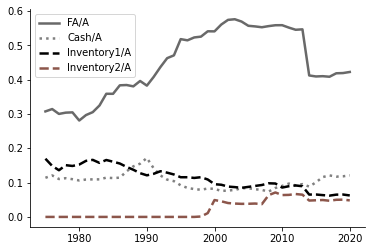

In [75]:
%matplotlib inline
Figure, ax=plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot(list3,dat7['FA/A'],c='dimgrey',label='FA/A',ls='-',lw=2.5)
ax.plot(list3,dat7['Cash/A'],c='grey',label='Cash/A',ls=':',lw=2.5)
ax.plot(list3,dat7['Inventory1/A'],c='k',label='Inventory1/A',ls='--',lw=2.5)
ax.plot(list3,dat7['Inventory2/A'],c='tab:brown',label='Inventory2/A',ls='--',lw=2.5)
ax.legend()
plt.show()